In [19]:
import csv
import matplotlib.pyplot as plt

In [20]:
def import_csv(path):
    with open(path, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        milliseconds = float(reader.__next__()[0])
        rows = int(reader.__next__()[0])
        columns = int(reader.__next__()[0])
        nnz = int(reader.__next__()[0])
        try:
            buffer_size = int(reader.__next__()[0])  # Bytes
        except:
            buffer_size = 0
        
    return milliseconds, rows, columns, nnz, buffer_size

In [21]:
execution_times_cusparse = []
nnz_array = []
buffer_array = []
row_array = []
column_array = []

for i in range(1, 11):
    ms, rows, columns, nnz, bf = import_csv(f'../output/csr_cusparse_{i}.csv')
    execution_times_cusparse.append(ms)
    nnz_array.append(nnz)
    buffer_array.append(bf)
    row_array.append(rows)
    column_array.append(columns)

print(execution_times_cusparse)
print(nnz_array)
print(buffer_array)
print(row_array)
print(column_array)

[1.25553, 0.0654336, 0.072192, 0.12329, 0.0666624, 0.069632, 0.067072, 0.067072, 0.0672768, 0.0668672]
[3802, 998, 4282, 9613, 1726, 1677, 1041, 2400, 2480, 2934]
[31441, 9009, 35281, 159847, 14833, 17547, 11339, 20225, 20865, 24497]
[822, 183, 541, 1224, 663, 1096, 638, 600, 512, 768]
[822, 183, 541, 1224, 663, 1096, 638, 600, 512, 768]


In [22]:
execution_times_coo = []
for i in range(1, 11):
    ms, rows, columns, nnz, _ = import_csv(f'../output/csr_coo_own_{i}.csv')
    execution_times_coo.append(ms)
    
print(execution_times_coo)

[1.01724, 0.207258, 0.864563, 4.39101, 0.430182, 0.828211, 0.257536, 0.520704, 0.499098, 0.730726]


In [23]:
execution_times_csc = []
for i in range(1, 11):
    ms, rows, columns, nnz, _ = import_csv(f'../output/csr_csc_own_{i}.csv')
    execution_times_csc.append(ms)
    
print(execution_times_csc)

[1.84371, 0.296243, 1.31881, 5.95016, 0.561459, 1.12804, 0.377651, 0.819917, 0.601088, 0.754586]


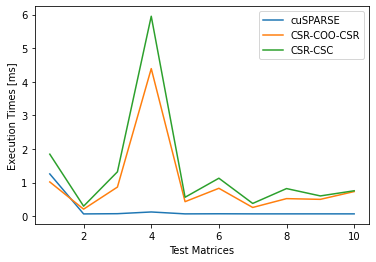

In [24]:
plt.figure()
plt.xlabel("Test Matrices")
plt.ylabel("Execution Times [ms]")
plt.plot(range(1, 11), execution_times_cusparse, label="cuSPARSE")
plt.plot(range(1, 11), execution_times_coo, label="CSR-COO-CSR")
plt.plot(range(1, 11), execution_times_csc, label="CSR-CSC")
plt.legend()

In [25]:
def effective_bandwidth(time, bytes):
    time *= 1e-3  # ms to s
    return ((bytes) / 1e9) / time

In [26]:
eb_cusparse = []
eb_coo = []
eb_csc = []

for i in range(0, 10):
    bytes = row_array[i] * column_array[i] * 4 * 2
    eb_cusparse.append(effective_bandwidth(execution_times_cusparse[i], bytes))
    eb_coo.append(effective_bandwidth(execution_times_coo[i], bytes))
    eb_csc.append(effective_bandwidth(execution_times_csc[i], bytes))
    
print(eb_cusparse)
print(eb_coo)
print(eb_csc)

[4.305330816467945, 4.094410211267606, 32.433621453900706, 97.21313975180469, 52.75165610599079, 138.00735294117646, 48.550095419847324, 42.93893129770992, 31.17199391171994, 70.56661562021438]
[5.313861035743777, 1.292649740902643, 2.7082445119673175, 2.7295332964397714, 8.174567973555378, 11.602994888983604, 12.64425944333996, 5.5309734513274345, 4.201884199095168, 6.457402637924475]
[2.931845029858275, 0.9043656727753905, 1.775424814795156, 2.0143001196606476, 6.2632391679534924, 8.51896032055601, 8.622648953663568, 3.512550660615648, 3.488926746166951, 6.25321964626961]


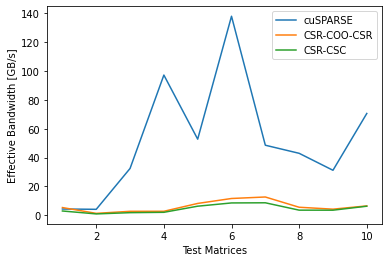

In [27]:
plt.figure()
plt.xlabel("Test Matrices")
plt.ylabel("Effective Bandwidth [GB/s]")
plt.plot(range(1, 11), eb_cusparse, label="cuSPARSE")
plt.plot(range(1, 11), eb_coo, label="CSR-COO-CSR")
plt.plot(range(1, 11), eb_csc, label="CSR-CSC")
#plt.plot(range(1, 11), [933]*10, label="Max. Bandwidth")
plt.legend()